**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Juan Manuel Carballo Montaño
*   MATRÍCULA: A01166758

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import os
# DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4/Actividad4_EDA"
# os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../datasets/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas? 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Respuesta

 * Las columnas que contienen datos **cualitativos** son: 'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file' and 'cb_person_default_on_file'
 * Las columnas que contienen datos **numéricos** son: 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'
 * la columna 'loan_status' contiene valores numéricos 1 y 0, sin embargo se considera como cualitativo porque representa una variable booleana o dicótoma pues solo representa dos categorías



 2. Determina el porcentaje de valores faltantes por columna.

In [6]:
def nan_percentage_by_col(data_df):
    percentage_by_col = []
    for col in data_df.columns:
        bools = df[col].isna()
        value = df[col][bools.values].shape[0] / df[col].shape[0]
        percentage_by_col.append("%0.2f%s"%((value * 100), "%"))
    
    return pd.DataFrame([[i, j] for i, j in zip(data_df.columns, percentage_by_col)], columns=['name', 'percentage'])

In [7]:
nan_percentage_by_col(df)

,name,percentage
0,person_age,0.00%
1,person_income,0.00%
2,person_home_ownership,0.00%
3,person_emp_length,2.75%
4,loan_intent,0.00%
5,loan_grade,0.00%
6,loan_amnt,0.00%
7,loan_int_rate,9.56%
8,loan_status,0.00%
9,loan_percent_income,0.00%


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis 


**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%) 

In [8]:
stats_df = df.describe()
stats_df.loc['skew'] = df.skew().to_list()
stats_df.loc['kurt'] = df.kurt().to_list()

stats_df

C:\Users\jmcar\AppData\Local\Temp\ipykernel_56196\1079036933.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats_df.loc['skew'] = df.skew().to_list()
C:\Users\jmcar\AppData\Local\Temp\ipykernel_56196\1079036933.py:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats_df.loc['kurt'] = df.kurt().to_list()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000
skew,2.581393,3.286535e+01,2.614455,1.192477,0.208550,1.364888,1.064669,1.661790
kurt,18.560825,2.693273e+03,43.722338,1.423565,-0.671609,-0.137088,1.223687,3.716194


Respuesta

 * Para la columna 'person_age', se puede apreciar un sesgo (skewness) positivo de 2.6 puntos lo que indica que es una muestra de personas relativamente jóvenes teniendo una mediana de 26 años y un promedio de 27.7 años y al tener una kurtosis de 18.5 puntos es un indicador de que la distribución tiene colas muy largas.
 * Para la columna 'loan_int_rate', se puede apreciar un sesgo positivo de 0.2 puntos lo que indica que es una muestra casi simetrica o similar a una distribución normal puesto que las tasas de interés son de casi 11% para ambos, mediana y promedio, sin embargo con una kurtosis negativa de -0.6 puntos se puede establecer que la distribución tiene colas más ligeras o menores que la distribución de comparación

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable. 
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.
 
**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma. 

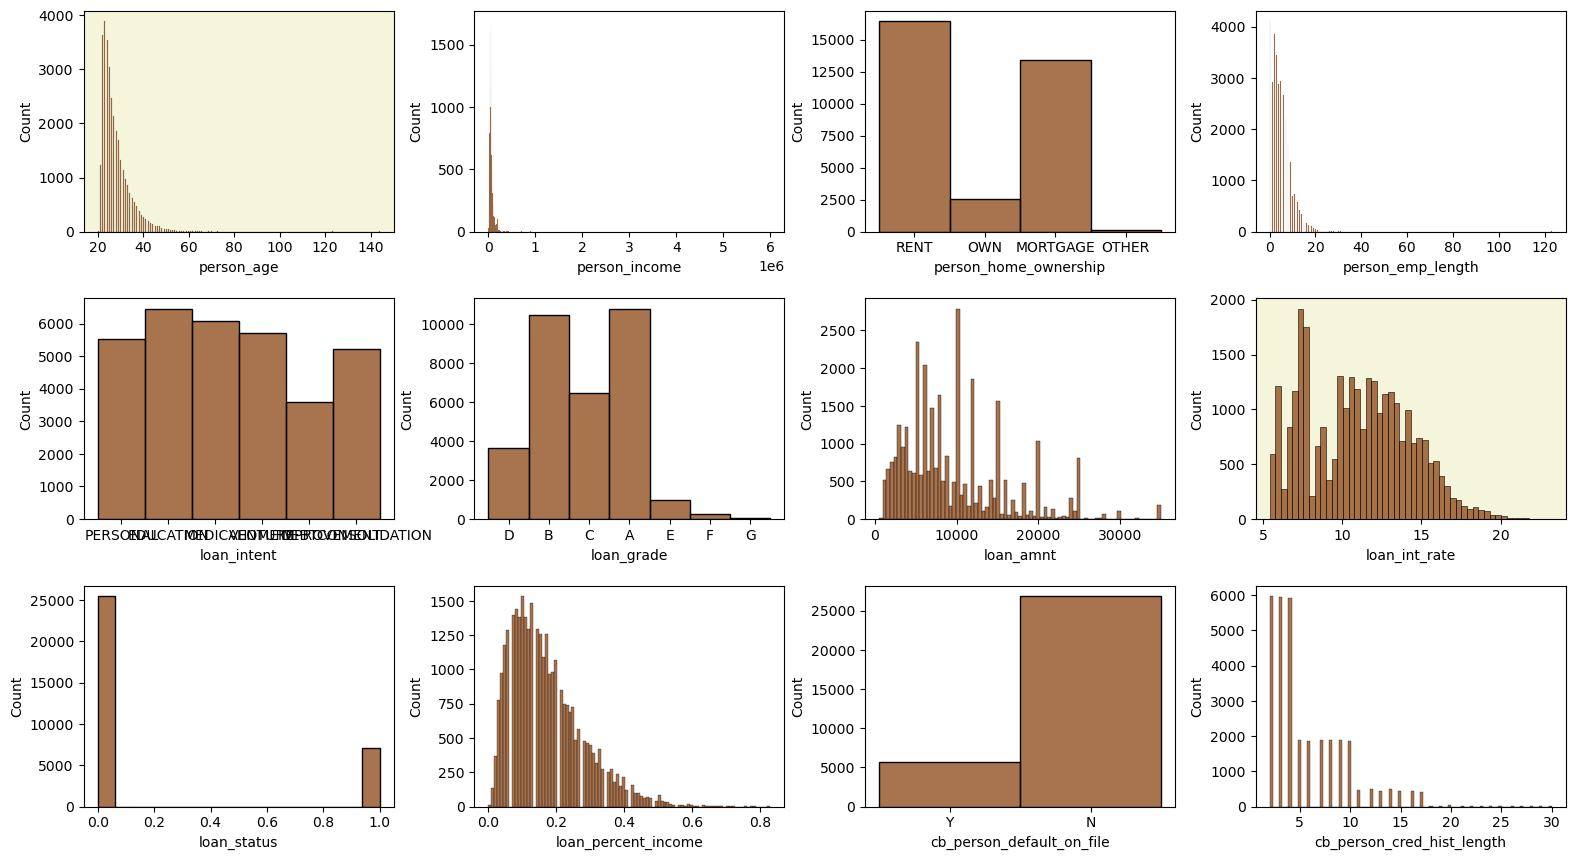

In [9]:
rows, cols = 3, 4

m = [i for i in range(rows) for j in range(cols)]
n = [j for i in range(rows) for j in range(cols)]


fig, axes = plt.subplots(rows, cols, figsize=(16, 9))
fig.tight_layout(pad=2.7)
for i, j, col in zip(m, n, df.columns):
    sns.histplot(df[col], ax=axes[i,j], color='saddlebrown')
    
axes[0,0].set_facecolor('beige')
axes[1,3].set_facecolor('beige')

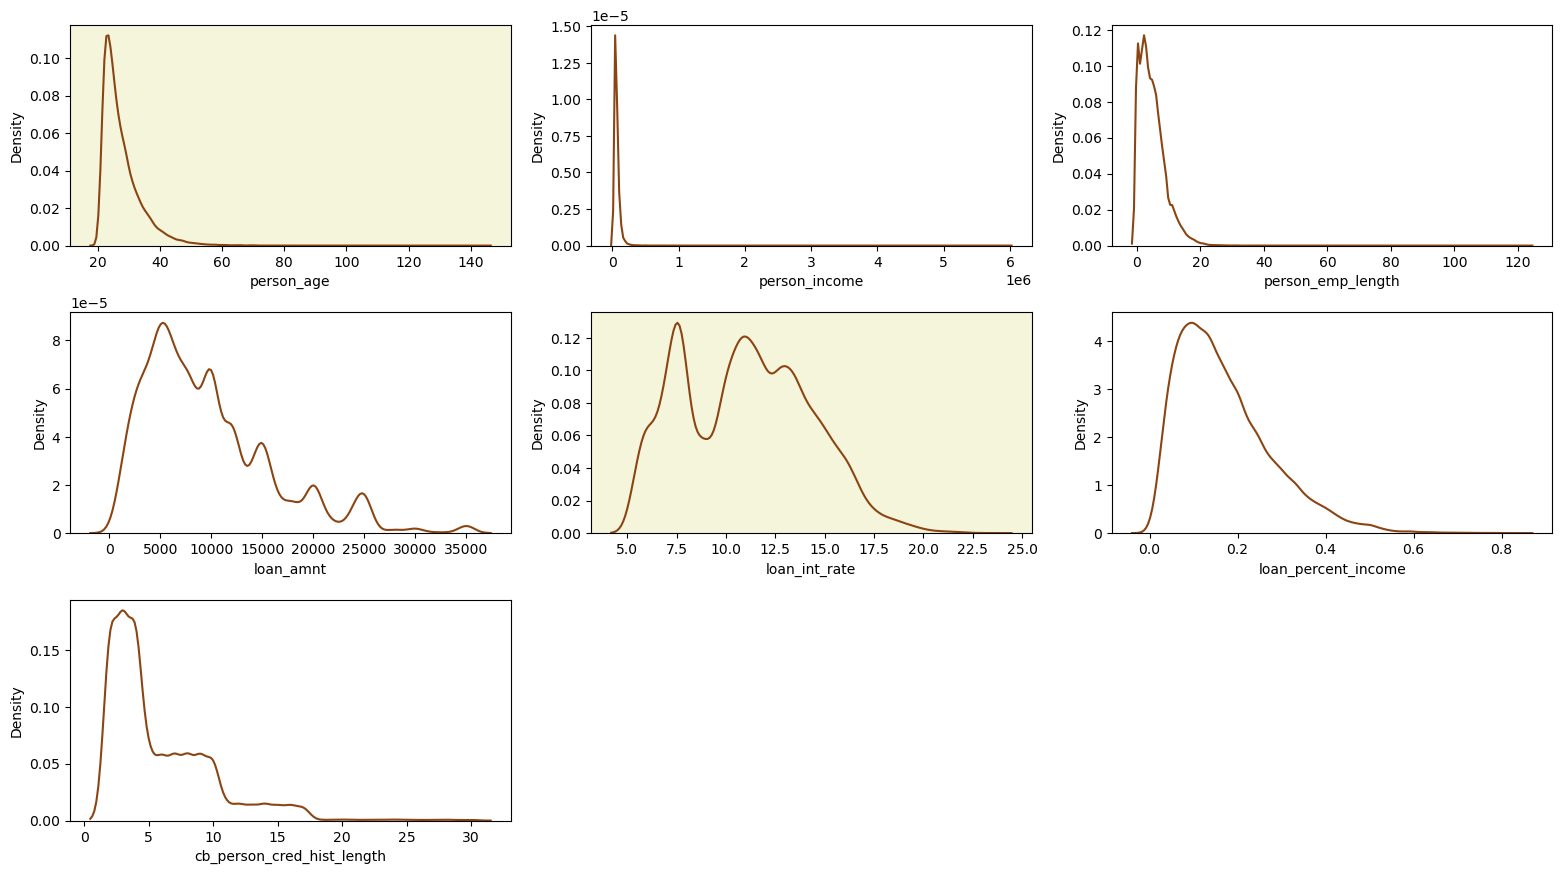

In [10]:
rows, cols = 3, 3

m = [i for i in range(rows) for j in range(cols)]
n = [j for i in range(rows) for j in range(cols)]

numeric = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

fig, axes = plt.subplots(rows, cols, figsize=(16, 9))
fig.tight_layout(pad=2.7)

for i, j, col in zip(m, n, numeric):
    sns.kdeplot(df[col], ax=axes[i,j], color='saddlebrown')
    
fig.delaxes(ax=axes[2,1])
fig.delaxes(ax=axes[2,2])
axes[0,0].set_facecolor('beige')
axes[1,1].set_facecolor('beige')


<Axes: ylabel='Frequency'>

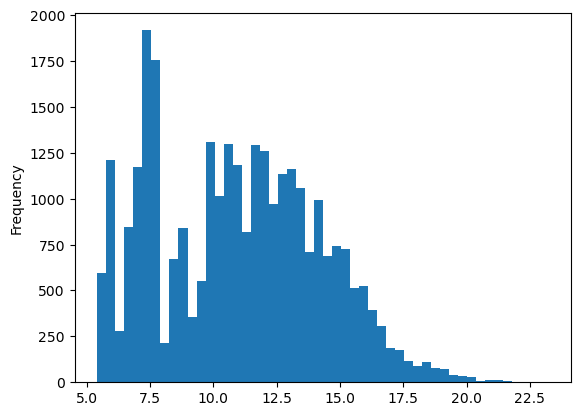

In [11]:
df['loan_int_rate'].plot(kind='hist', bins=50)

Respuesta

 * Para el caso 'person_age' fue descrita con precisión por los indicadores de skewness y kurtosis
 * Para el caso 'loan_int_rate' se describio una forma casi precisa en la muestra al momento de obtener una grafica de tipo KDE e histograma se puede apreciar dos picos y un valle y se puede decir que los valores de los valores de los estimadores fueron casi precisos.

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles. 

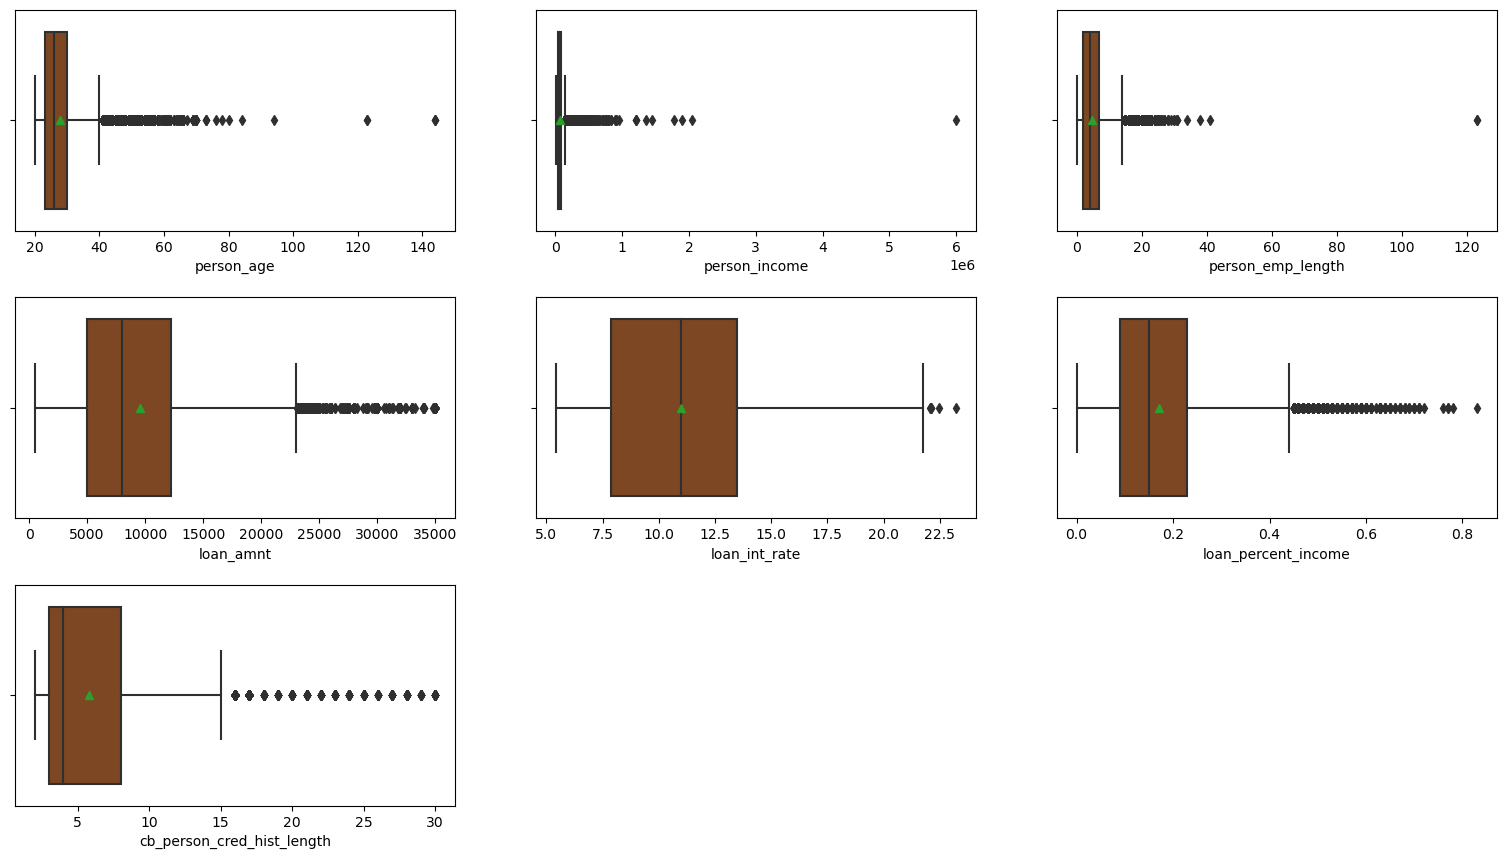

In [12]:
rows, cols = 3, 3

m = [i for i in range(rows) for j in range(cols)]
n = [j for i in range(rows) for j in range(cols)]

numeric = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

fig, axes = plt.subplots(rows, cols, figsize=(16, 9))
fig.tight_layout(pad=2.7)

for i, j, col in zip(m, n, numeric):
    sns.boxplot(x=df[col], ax=axes[i,j],  color='saddlebrown', showmeans=True)


fig.delaxes(ax=axes[2,1])
fig.delaxes(ax=axes[2,2])

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [13]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables categóricas

 6. Obtén las siguientes estadísticas descriptivas para todas las variables categóricas:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)
   
**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object, que en este caso coinciden con las categóricas: `describe(include = 'object')`. Para los recuentos utiliza la función `df["columna"].value_counts()` 

In [14]:
cat_df = df.describe(include='object')
cat_df

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [15]:
df1 = df['person_home_ownership'].value_counts()
df1

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [16]:
df2 = df['loan_intent'].value_counts()
df2

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [17]:
df3 = df['loan_grade'].value_counts()
df3

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [18]:
df4 = df['cb_person_default_on_file'].value_counts()
df4

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables categóricas, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x="columna", data=df) `

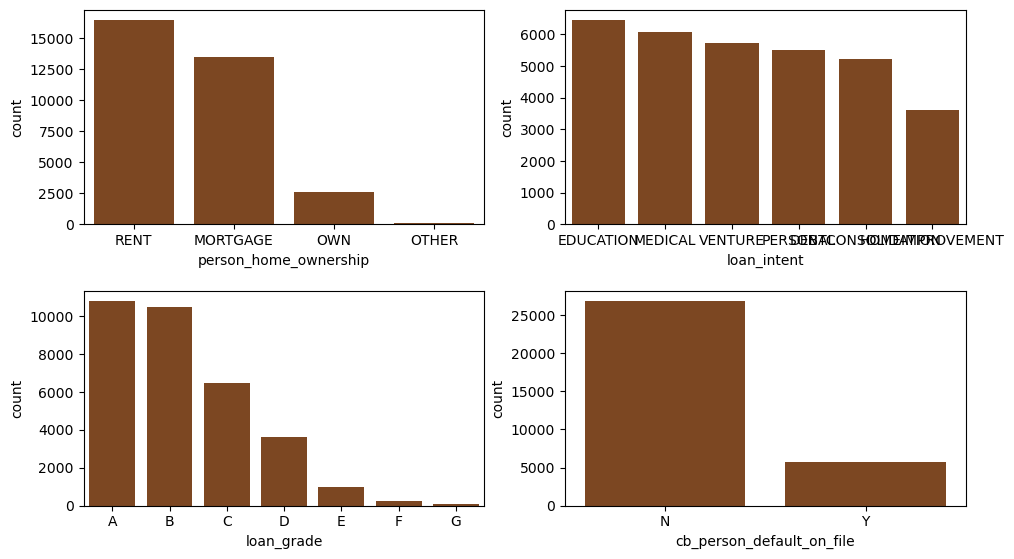

In [19]:
rows,cols = 2,2

m = [i for i in range(rows) for j in range(cols)]
n = [j for i in range(rows) for j in range(cols)]

categoric = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
fig.tight_layout(pad=2.7)

for i, j, col in zip(m, n, categoric):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i,j], color='saddlebrown')


# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos: 

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `load_status`. Interpreta el resultado.	

<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

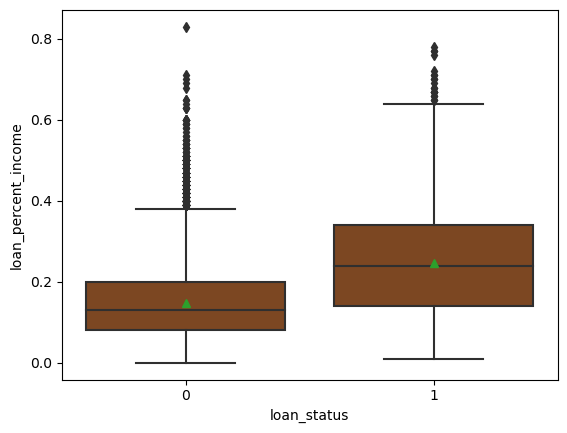

In [20]:
sns.boxplot(df, x='loan_status', y='loan_percent_income', color='saddlebrown', showmeans=True)

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

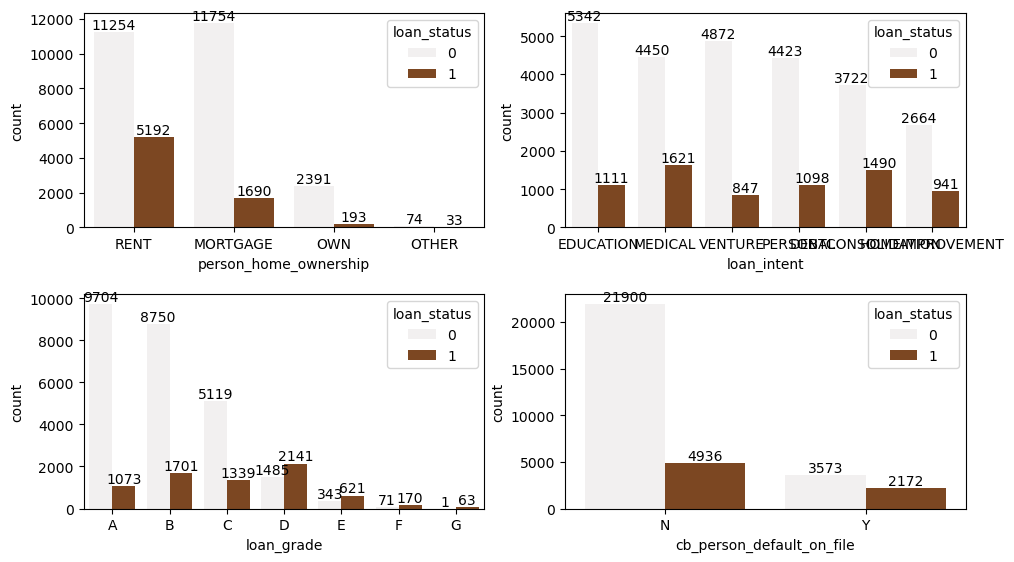

In [21]:
rows,cols = 2,2

m = [i for i in range(rows) for j in range(cols)]
n = [j for i in range(rows) for j in range(cols)]

categoric = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
fig.tight_layout(pad=2.7)

for i, j, col in zip(m, n, categoric):
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue='loan_status', ax=axes[i,j], color='saddlebrown')
    for container in ax.containers:
        ax.bar_label(container)

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

In [22]:
correlation_df = df.corr(method='pearson')
correlation_df

C:\Users\jmcar\AppData\Local\Temp\ipykernel_56196\3712261342.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_df = df.corr(method='pearson')


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


<Axes: >

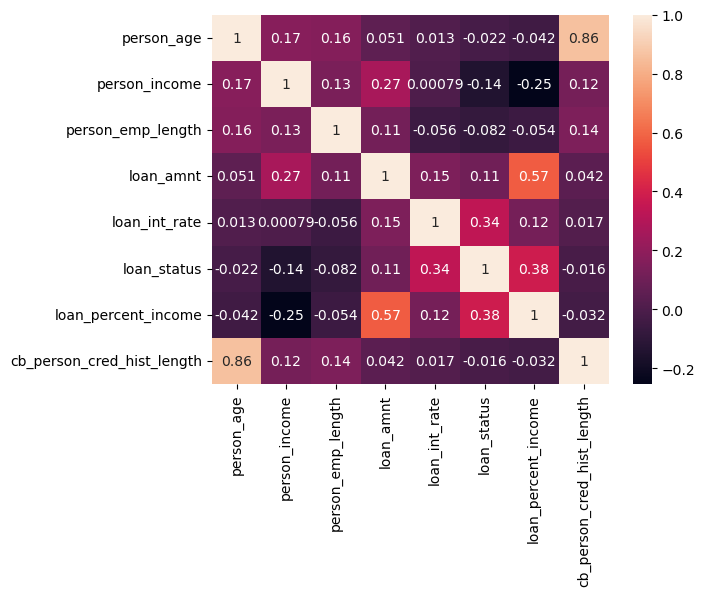

In [23]:
sns.heatmap(correlation_df, xticklabels=correlation_df.columns, yticklabels=correlation_df.columns, annot=True)

Respuestas

 * Las personas con una relación préstamo-ingreso son más morosos que las personas con una relación préstamo-ingreso menor
 * Las personas que rentan un hogar tienen una mayor cantidad de préstamos con incumplimiento que las demás personas
 * En general no hubo una diferencia de las personas con un crédito es estado moroso para una intención particular. (Educación, Vivienda, Emprendimiento, Personal, Consolidación de la Deuda o Remodelación)
 * A medida que la calificacion del crédito se reduce la cantidad de personas con incumplimiento de los pagos aumenta
 * Podría parecer una paradoja, existe una mayor cantidad de personas morosas que no están en buro que personas morosa que están en buro, 4936 contra 2172, ante tal situación podemos citar a la Paradoja de Simpson que consiste en la desaparición o inversión de una relación entre diferentes variables cuando los datos se agrupan de forma diferente, en función de otra variable no considerada previamente.
  * Cuando analizamos la correlacion entre las diferentes columnas, encontramos que para la columna loan_status existen una mayor correlacion con las columnas loan_int_rate y loan_percent_income